In [1]:
from rlmodule_2 import *
import matplotlib.pyplot as plt

In [2]:
#initialise important parameters
q = np.ones([4,70])
w = np.ones(70)*10
gamma = 1

In [3]:
#creating a function to run a finite episode
def run_finite_episode(q,w,alpha,gamma):
  #first state will be
  state = env.reset()
  is_done = False 
  I = 1
  #loop while S is not terminal for each time step
  no_step = 0
  total_reward = 0
  while no_step < 500 and is_done == False:
    #sample an action using the policy
    action = sample_action(state,q)
    #take the action A, observe S', R
    new_state, reward, is_done, _ = env.step(action)
    if is_done == True:
      delta = reward + gamma*0 -v(w,state)
    else:
      delta = reward + gamma*v(w,new_state) -v(w,state)
    #defining some important parameters
    r_exp = reward + v(w,new_state)
    beta = r_exp - v(w,state)
    #now we will update the weight parameters
    #using adam-algorithm we will write the standard stochastic gradient descent as
    z_times_policy = 0
    prob_action = policy(state,q)
    for i in range(4):
      z_times_policy += prob_action[i]*z(state,i)
    z_ = z(state,action)
    z_times_policy = z_times_policy.transpose()
    z_ = z_.transpose()
    q += alpha*beta*(z_-z_times_policy)
    w += alpha*beta*y(state)
    no_step += 1
    total_reward += reward
    state = new_state
  return no_step,total_reward



In [4]:
def run_episode_dont_update(q,w):
  state = env.reset()
  is_done = False
  #loop while S is not terminal for each time step
  no_step = 0
  total_reward = 0
  while no_step < 500 and is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    no_step += 1
    total_reward += reward
    state = new_state
  return no_step,total_reward

In [5]:
#for first 2000 rounds of training
alpha = 0.001
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_finite_episode(q,w,alpha,gamma)
  tot_episodes += 100

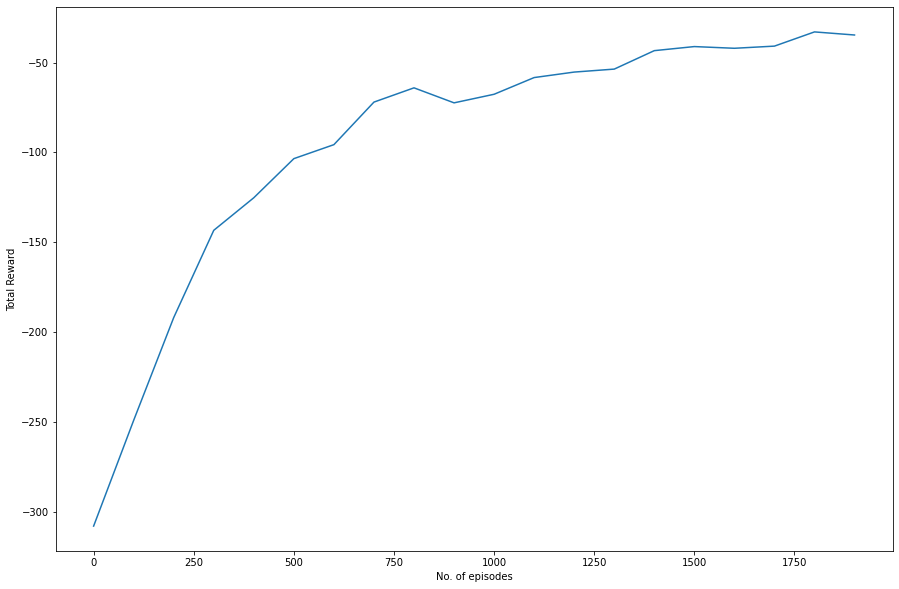

In [6]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [7]:
reward_tot[-1]

-34.693333333333335

In [8]:
aa = reward_tot

In [9]:
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
  state = env.reset()
  times_visited[3][0] += 1
  no_steps_this_loop = 0
  is_done = False
  while is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    state = new_state
    a,b = divmod(state,10)
    times_visited[a][b] += 1
    no_steps_this_loop +=1
    Tot_steps += 1
  no_steps.append(no_steps_this_loop)

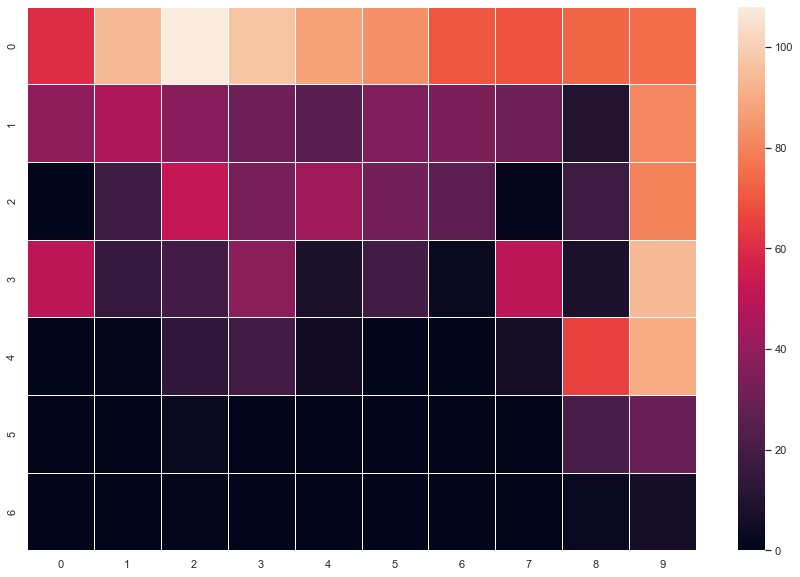

In [10]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [11]:
#for first 2000 rounds of training
alpha = 0.01
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_finite_episode(q,w,alpha,gamma)
  tot_episodes += 100

In [12]:
aa.extend(reward_tot)

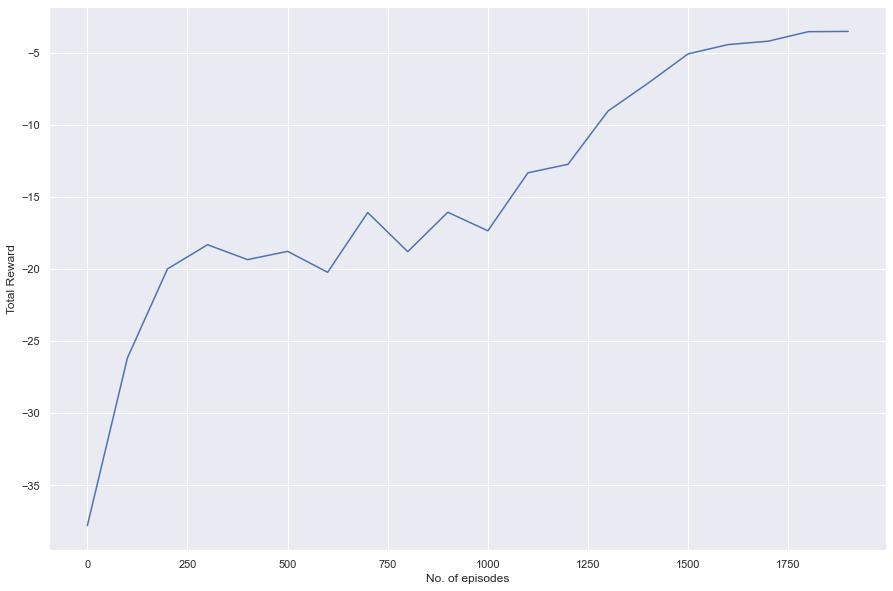

In [13]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [14]:
reward_tot[-1]

-3.526666666666667

In [15]:
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
  state = env.reset()
  times_visited[3][0] += 1
  no_steps_this_loop = 0
  is_done = False
  while is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    state = new_state
    a,b = divmod(state,10)
    times_visited[a][b] += 1
    no_steps_this_loop +=1
    Tot_steps += 1
  no_steps.append(no_steps_this_loop)

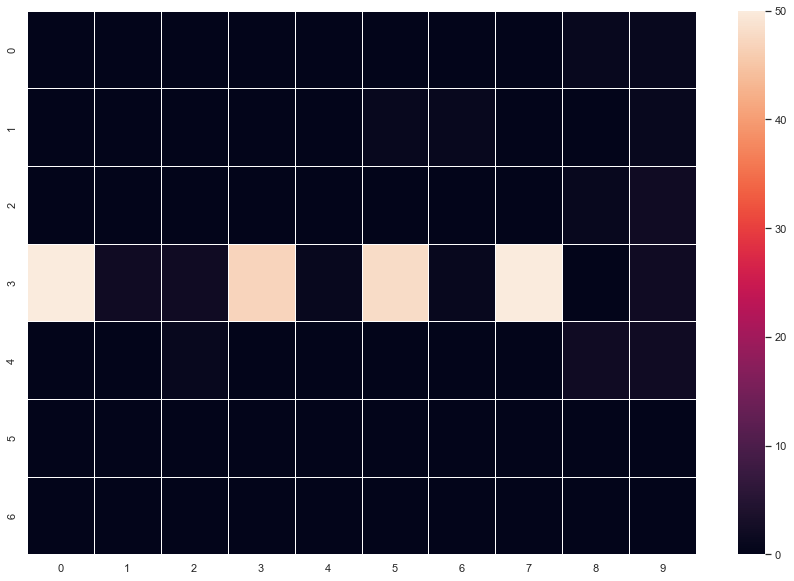

In [16]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [17]:
#for first 2000 rounds of training
alpha = 0.1
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_finite_episode(q,w,alpha,gamma)
  tot_episodes += 100

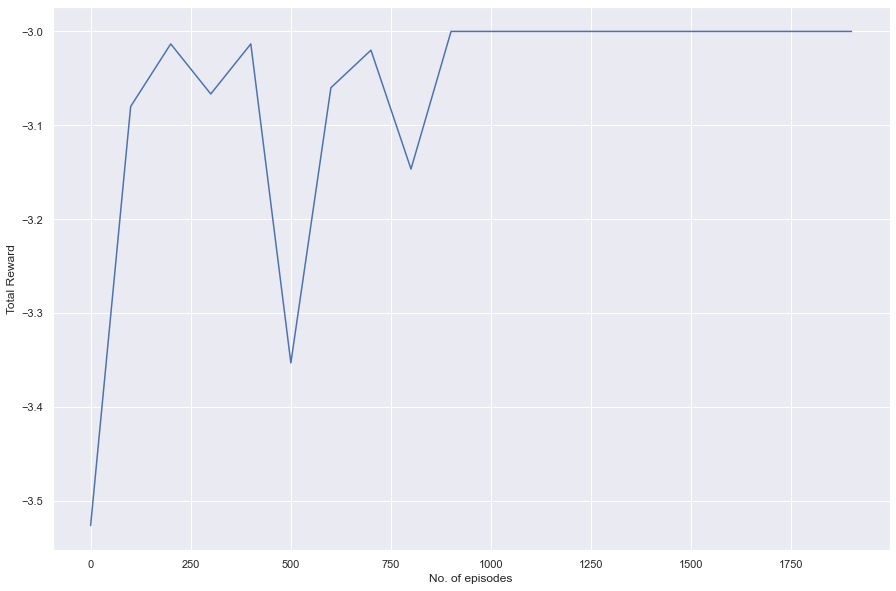

In [18]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [19]:
reward_tot[-1]

-3.0

In [20]:
aa.extend(reward_tot)
print(aa)

[-307.92, -249.08666666666667, -191.90666666666667, -143.36, -125.23333333333333, -103.48, -95.7, -72.02, -64.09333333333333, -72.44, -67.66666666666667, -58.373333333333335, -55.32, -53.666666666666664, -43.4, -41.13333333333333, -42.08, -40.88, -32.973333333333336, -34.693333333333335, -37.81333333333333, -26.18, -20.006666666666668, -18.326666666666668, -19.36, -18.786666666666665, -20.24, -16.093333333333334, -18.80666666666667, -16.073333333333334, -17.36, -13.34, -12.746666666666666, -9.053333333333333, -7.12, -5.086666666666667, -4.44, -4.206666666666667, -3.546666666666667, -3.526666666666667, -3.526666666666667, -3.08, -3.013333333333333, -3.066666666666667, -3.013333333333333, -3.3533333333333335, -3.06, -3.02, -3.1466666666666665, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0]


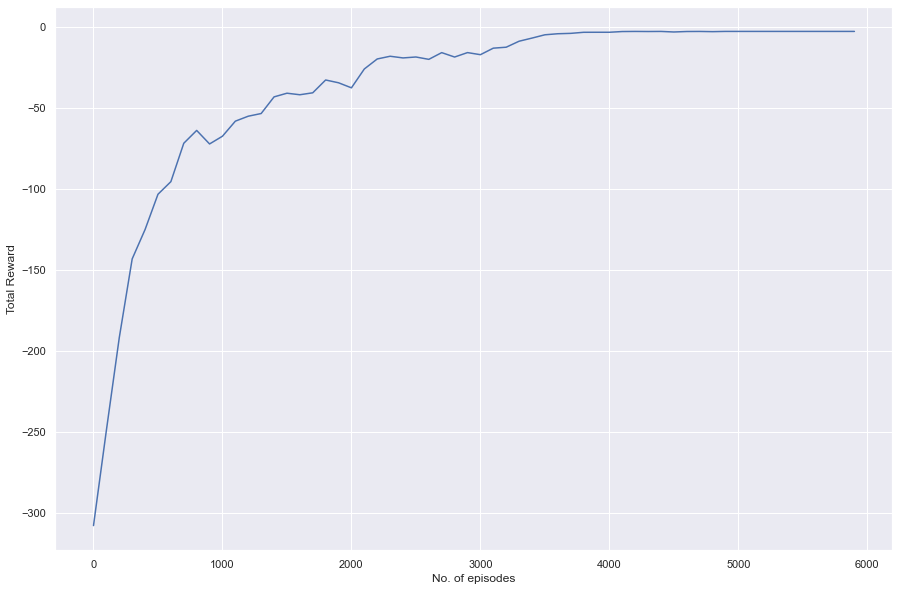

In [21]:
episodes_x = np.linspace(0,5900,60)
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(episodes_x,aa)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [22]:
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
  state = env.reset()
  times_visited[3][0] += 1
  no_steps_this_loop = 0
  is_done = False
  while is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    state = new_state
    a,b = divmod(state,10)
    times_visited[a][b] += 1
    no_steps_this_loop +=1
    Tot_steps += 1
  no_steps.append(no_steps_this_loop)

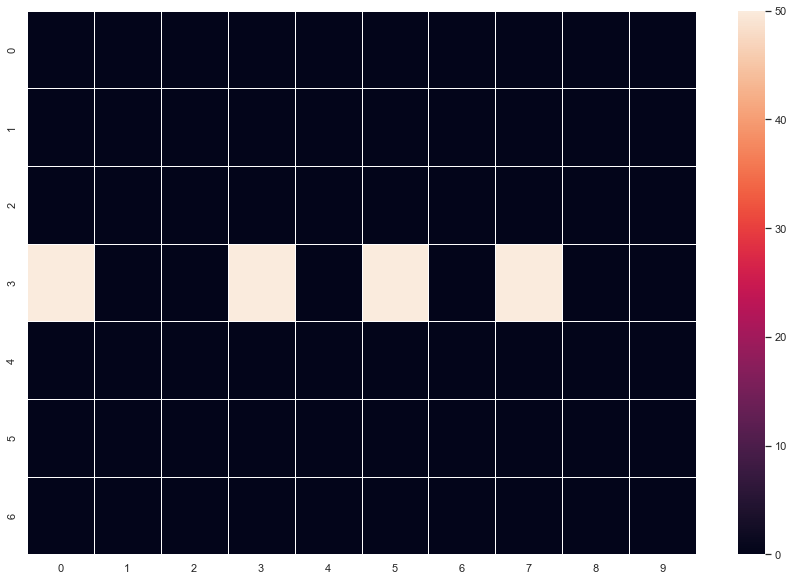

In [23]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [24]:
#let us try to plot the value function for the grid
value_grid = np.zeros(times_visited.shape)
for i in range(7):
  for j in range(10):
    s = i*10 +j
    value_grid[i][j] = v(w,s)
val = pd.DataFrame(value_grid)
val

,0,1,2,3,4,5,6,7,8,9
0,4.523261,3.717892,2.960308,2.316090,1.692127,0.962003,0.337539,-0.558499,1.081517,2.970043
1,5.002804,4.327936,3.156168,3.278371,2.350424,0.305656,-0.135203,1.162462,2.449785,4.301669
2,10.000000,5.430667,5.571481,2.059287,0.854958,0.378503,0.252019,2.988058,3.100781,5.451244
3,6.999955,4.641878,7.308045,7.999996,2.507208,9.000000,2.787116,10.000000,7.011137,6.490658
4,3.689919,3.581026,3.862602,4.354938,6.566672,3.414986,10.000000,7.837960,8.894517,7.669459
5,3.914205,3.943238,3.965714,5.073979,3.974313,10.000000,10.000000,9.359927,7.411164,6.649893
6,4.025675,4.201434,4.288274,4.421955,10.000000,10.000000,10.000000,10.000000,8.422297,7.363520
